<a href="https://colab.research.google.com/github/Hrituja/Stock-Market-Prediction/blob/master/LSTM_Tabulardata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model

Using TensorFlow backend.


In [0]:

num_companies = 4
look_back = 40
forward_days = 10
num_periods = 20

companies_names = ['A', 'B', 'C', 'D']
colors = ['r','g','c','m','y','k','w','b'] #from matplotlib

In [0]:
from google.colab import files
uploaded = files.upload()

Saving company_A.csv to company_A.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving company_B.csv to company_B.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving company_C.csv to company_C.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving company_D.csv to company_D.csv


In [0]:
# urlA = 'https://github.com/alexavierc/LSTM-Stock-Prices/blob/master/data/microsoft.csv'

# df_A = pd.read_csv(urlA)
import io
# df_A = pd.read_csv(io.BytesIO(uploaded['company_A.csv']))
df_A = pd.read_csv('company_B.csv')
df_A['Date'] = pd.to_datetime(df_A['Date'])

df_B = pd.read_csv('company_B.csv')
df_B['Date'] = pd.to_datetime(df_B['Date'])

df_C = pd.read_csv('company_C.csv')
df_C['Date'] = pd.to_datetime(df_C['Date'])

df_D = pd.read_csv('company_D.csv')
df_D['Date'] = pd.to_datetime(df_D['Date'])

In [0]:
companies = [df_A, df_B, df_C, df_D]

for comapany in companies:
    comapany.set_index('Date', inplace=True)
    comapany.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [0]:
df_A.tail()

,Close
Date,
2018-12-31,101.570000
2019-01-02,101.120003
2019-01-03,97.400002
2019-01-04,101.930000
2019-01-07,102.059998


In [0]:
df_B.head()

,Close
Date,
2010-01-08,30.660000
2010-01-11,30.270000
2010-01-12,30.070000
2010-01-13,30.350000
2010-01-14,30.959999


In [0]:

print(len(df_A))
print(len(df_B))
print(len(df_C))
print(len(df_D))

2264
2264
2264
2264


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


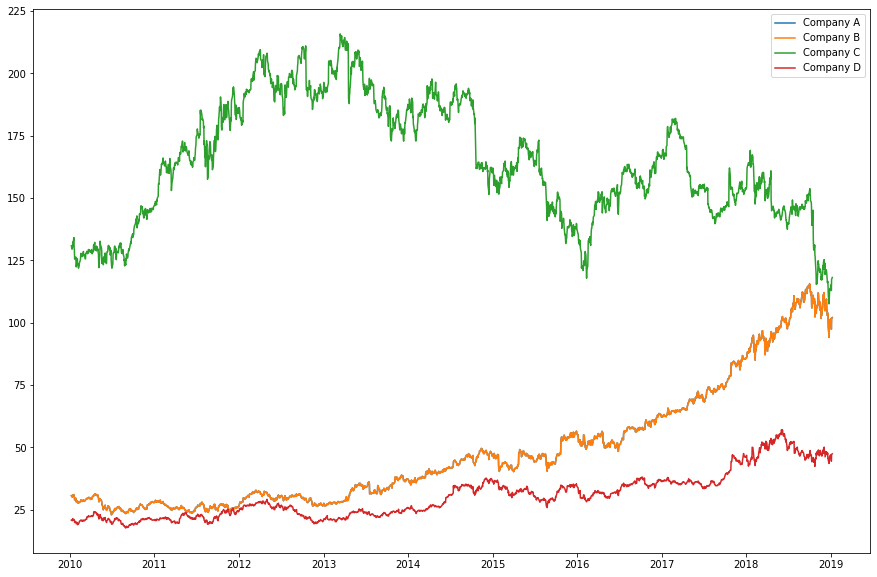

In [0]:
plt.figure(figsize = (15,10))

plt.plot(df_A, label='Company A')
plt.plot(df_B, label='Company B')
plt.plot(df_C, label='Company C')
plt.plot(df_D, label='Company D')

plt.legend(loc='best')
plt.show()

In [0]:

scl = MinMaxScaler()
    
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [0]:
array = scl.fit_transform(np.concatenate((args[0],args[1],args[2],args[3]), axis=1))

In [0]:
#split in Train and Test
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [0]:

#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [0]:

X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days,num_companies)
y = np.array([list(x.ravel()) for x in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)
#(Sample,Timestep,Features)

(1612, 40, 4)
(403, 40, 4)
(20, 40, 4)
(1612, 40)
(403, 40)
(20, 40)


In [0]:

NUM_NEURONS_FirstLayer = 200
NUM_NEURONS_SecondLayer = 100
EPOCHS = 10

#Build the model
model = Sequential()

model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,num_companies), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days * num_companies))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

Train on 1612 samples, validate on 403 samples
Epoch 1/10
 - 114s - loss: 0.0037 - val_loss: 0.0016
Epoch 2/10
 - 112s - loss: 0.0018 - val_loss: 0.0019
Epoch 3/10
 - 112s - loss: 0.0013 - val_loss: 0.0014
Epoch 4/10
 - 112s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
 - 115s - loss: 0.0011 - val_loss: 8.8921e-04
Epoch 6/10
 - 115s - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
 - 117s - loss: 0.0010 - val_loss: 0.0012
Epoch 8/10
 - 115s - loss: 9.7034e-04 - val_loss: 8.3352e-04
Epoch 9/10
 - 118s - loss: 9.5798e-04 - val_loss: 8.8371e-04
Epoch 10/10
 - 112s - loss: 9.4628e-04 - val_loss: 8.7697e-04


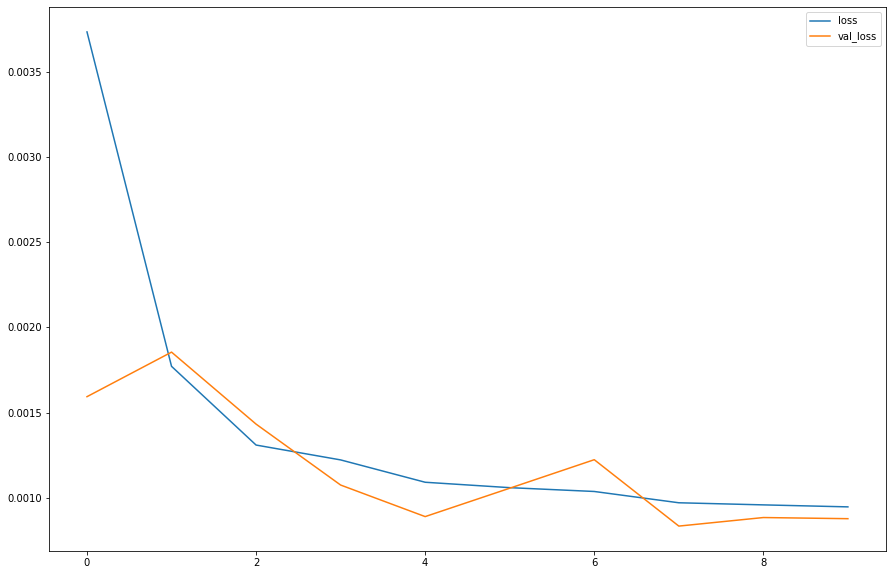

In [0]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

In [0]:
#Saving the model
"""file_name = 'Redes/several-companies/LSTM_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
model.save(file_name)
print("Saved model `{}` to disk".format(file_name))"""

'file_name = \'Redes/several-companies/LSTM_LB{}_FD{}_E{}_F{}_S{}.h5\'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)\nmodel.save(file_name)\nprint("Saved model `{}` to disk".format(file_name))'

In [0]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

Xt = model.predict(X_test)
Xt.shape

(20, 40)

In [0]:
def do_inverse_transform(output_result,num_companies = 4):
    #From input/output nootbook: apply makeup, use scl.inverse_transform and remove makeup
    
    #transform to input shape
    original_matrix_format = []
    for result in output_result:
        #do inverse transform
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    #restore to original shape
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [0]:

def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [0]:

Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(4, 20, 10)

In [0]:
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [0]:
Yt = do_inverse_transform(y_test)

MT = target_by_company(Yt, num_companies)
MT.shape

(4, 200)

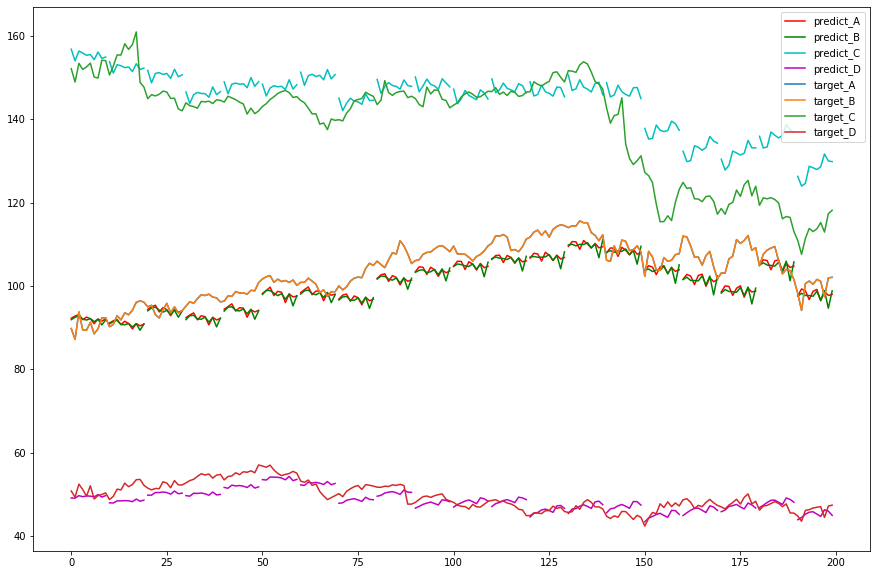

In [0]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3] #select one of [0,1,2,3] to see only one


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()

In [0]:
X_all,y_all = processData(array,look_back,forward_days,num_companies,forward_days)
y_all = np.array([list(a.ravel()) for a in y_all])

In [0]:

Xt = model.predict(X_all)
Xt.shape

In [0]:

Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

In [0]:
Yt = do_inverse_transform(y_all)

MT = target_by_company(Yt, num_companies)
MT.shape

In [0]:
plt.figure(figsize = (15,10))

companies_to_show = [0,1,2,3]#select one of [0,1,2,3] to see only one


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show(